In [1]:
%load_ext autoreload
%autoreload 2

from time import time
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from medicane_utils.load_files import load_cyclones_track_noheader
from medicane_utils.geo_const import latcorners, loncorners

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Apro tutti i file CL di Manos per fare un solo DataFrame

In [4]:
manos_track_files_dir = Path("../CompositeTracks_MedCyclones_Flaounas_etal_2023")
tracks_file_prefix_templ = "TRACKS_CL§.dat"  


def get_alltrack_files(manos_track_files_dir, tracks_file_prefix_templ):
    """
    # ritorna una lista di dataframe
    """
    
    alltrack_files = [manos_track_files_dir / tracks_file_prefix_templ.replace('§', f"{i}") for i in range(2,11)]
    [print(f"Trovato: {str(t)}") for t in alltrack_files]

    alldfs = []
    i=2
    for tracks_file in alltrack_files:
        df_tracks = load_cyclones_track_noheader(tracks_file)
        df_tracks['time'] = pd.to_datetime(df_tracks['time'])
        alldfs.append(df_tracks)
        print(f"Righe presenti nel file CL{i}: {df_tracks.shape[0]}")
        i+=1
        
    return alldfs

alldfs = get_alltrack_files(manos_track_files_dir, tracks_file_prefix_templ)

Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL2.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL3.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL4.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL5.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL6.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL7.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL8.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL9.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL10.dat
Righe presenti nel file CL2: 616780
Righe presenti nel file CL3: 470106
Righe presenti nel file CL4: 347437
Righe presenti nel file CL5: 267345
Righe presenti nel file CL6: 199505
Righe presenti nel file CL7: 139135
Righe presenti nel file CL8: 93876
Righe presenti nel file CL9: 50525
Righe presenti nel file CL10: 19849


In [5]:
alldfs[0]

,id_cyc,lat,lon,time,pressure
0,00000001,48.120,-17.750,1979-01-03 01:00:00,995.45
1,00000001,48.163,-17.447,1979-01-03 02:00:00,993.78
2,00000001,48.143,-16.979,1979-01-03 03:00:00,992.60
3,00000001,48.078,-16.344,1979-01-03 04:00:00,991.93
4,00000001,48.031,-15.679,1979-01-03 05:00:00,990.32
...,...,...,...,...,...
616775,00012750,20.938,-5.562,2020-08-06 06:00:00,1003.98
616776,00012750,20.847,-5.564,2020-08-06 07:00:00,1004.90
616777,00012750,20.739,-5.583,2020-08-06 08:00:00,1005.09
616778,00012750,20.625,-5.611,2020-08-06 09:00:00,1005.62


In [6]:
alldfs[5].id_cyc
(alldfs[5].id_cyc == '00001283').sum()

52

#### conto il numero di cicloni unici per ogni file

In [7]:
[df.id_cyc.nunique() for df in alldfs]
# -> abbiamo 12750 cicloni in tutto nel CL2, e 206 nel CL10

[12750, 8425, 5445, 3808, 2638, 1716, 1089, 565, 206]

### verifico se gli id ciclone siano gli stessi

In [8]:
# prendo un ciclone per esempio
idc = alldfs[0].id_cyc.unique()[30] 
idc

'00000031'

In [9]:
m0 = alldfs[0].id_cyc == idc

In [10]:
m1 = alldfs[-1].id_cyc == idc

In [11]:
alldfs[0][m0]

,id_cyc,lat,lon,time,pressure
1730,00000031,30.130,31.380,1979-02-26 08:00:00,1011.01
1731,00000031,30.387,31.323,1979-02-26 09:00:00,1010.61
1732,00000031,30.660,31.245,1979-02-26 10:00:00,1010.83
1733,00000031,30.871,31.262,1979-02-26 11:00:00,1009.91
1734,00000031,30.982,31.444,1979-02-26 12:00:00,1009.16
1735,00000031,31.026,31.759,1979-02-26 13:00:00,1008.14
1736,00000031,31.078,32.130,1979-02-26 14:00:00,1008.41
1737,00000031,31.217,32.538,1979-02-26 15:00:00,1008.50
1738,00000031,31.539,33.041,1979-02-26 16:00:00,1008.88
1739,00000031,32.085,33.645,1979-02-26 17:00:00,1009.01


In [12]:
alldfs[-1][m1]

,id_cyc,lat,lon,time,pressure
3083,00000031,37.020,-1.550,1983-11-16 07:00:00,1001.15
3084,00000031,37.228,-1.302,1983-11-16 08:00:00,1001.36
3085,00000031,37.510,-0.948,1983-11-16 09:00:00,1002.17
3086,00000031,37.853,-0.511,1983-11-16 10:00:00,1002.97
3087,00000031,38.210,-0.078,1983-11-16 11:00:00,1002.27
...,...,...,...,...,...
3194,00000031,30.388,20.940,1983-11-20 22:00:00,1016.20
3195,00000031,30.296,21.156,1983-11-20 23:00:00,1016.08
3196,00000031,30.233,21.417,1983-11-21 00:00:00,1016.32
3197,00000031,30.196,21.708,1983-11-21 01:00:00,1016.02


### no -> quindi poi per il tracks df resettiamo l'index

In [13]:
lat=30.388
lon=20.940
time=pd.to_datetime("1983-11-20 22:00:00")

In [14]:
mascherone = (alldfs[0].lat==lat) & (alldfs[0].lon==lon) & (alldfs[0].time==time)

In [15]:
alldfs[0][mascherone]

,id_cyc,lat,lon,time,pressure
65240,00001315,30.388,20.94,1983-11-20 22:00:00,1016.2


In [16]:
mascherone1 = (alldfs[-1].lat==lat) & (alldfs[-1].lon==lon) & (alldfs[-1].time==time)
alldfs[-1][mascherone1]

,id_cyc,lat,lon,time,pressure
3194,00000031,30.388,20.94,1983-11-20 22:00:00,1016.2


##### verifico che le coordinate e i tempi almeno siano uguali  (-> neanche: alcuni CL hanno coordinate leggermente diverse)

In [17]:
cln = -1

In [18]:
id_unici = alldfs[cln].id_cyc.unique()
cols = ['lat','lon','time']
for idc in id_unici:
    mask = alldfs[cln].id_cyc == idc
    righe = alldfs[cln][mask][cols]
    all_rows = righe.merge(alldfs[0][cols], how='left', indicator=True)['_merge'].eq('both')
    all_rows_present = all_rows.all()
    #p = all_rows.sum()/righe.shape[0]
    print(f"id {idc} presente interamente in CL2? {all_rows_present} con {all_rows.sum()} righe su {righe.shape[0]}")

id 00000001 presente interamente in CL2? True con 86 righe su 86
id 00000002 presente interamente in CL2? True con 48 righe su 48
id 00000003 presente interamente in CL2? True con 159 righe su 159
id 00000004 presente interamente in CL2? True con 67 righe su 67
id 00000005 presente interamente in CL2? True con 111 righe su 111
id 00000006 presente interamente in CL2? True con 186 righe su 186
id 00000007 presente interamente in CL2? True con 57 righe su 57
id 00000008 presente interamente in CL2? True con 111 righe su 111
id 00000009 presente interamente in CL2? True con 107 righe su 107
id 00000010 presente interamente in CL2? True con 149 righe su 149
id 00000011 presente interamente in CL2? True con 128 righe su 128
id 00000012 presente interamente in CL2? False con 79 righe su 98
id 00000013 presente interamente in CL2? True con 75 righe su 75
id 00000014 presente interamente in CL2? True con 122 righe su 122
id 00000015 presente interamente in CL2? True con 56 righe su 56
id 00000

In [19]:
righe = alldfs[-1][m1][['lat','lon','time']]
righe

,lat,lon,time
3083,37.020,-1.550,1983-11-16 07:00:00
3084,37.228,-1.302,1983-11-16 08:00:00
3085,37.510,-0.948,1983-11-16 09:00:00
3086,37.853,-0.511,1983-11-16 10:00:00
3087,38.210,-0.078,1983-11-16 11:00:00
...,...,...,...
3194,30.388,20.940,1983-11-20 22:00:00
3195,30.296,21.156,1983-11-20 23:00:00
3196,30.233,21.417,1983-11-21 00:00:00
3197,30.196,21.708,1983-11-21 01:00:00


In [20]:
all_rows_present = righe.merge(alldfs[0][['lat','lon','time']], how='left', indicator=True)#['_merge'].eq('both').all()
all_rows_present

,lat,lon,time,_merge
0,37.020,-1.550,1983-11-16 07:00:00,both
1,37.228,-1.302,1983-11-16 08:00:00,both
2,37.510,-0.948,1983-11-16 09:00:00,both
3,37.853,-0.511,1983-11-16 10:00:00,both
4,38.210,-0.078,1983-11-16 11:00:00,both
...,...,...,...,...
111,30.388,20.940,1983-11-20 22:00:00,both
112,30.296,21.156,1983-11-20 23:00:00,both
113,30.233,21.417,1983-11-21 00:00:00,both
114,30.196,21.708,1983-11-21 01:00:00,both


In [21]:
righe.merge(alldfs[0][['lat','lon','time']], how='left', indicator=True)['_merge'].eq('both').sum()/righe.shape[0]

1.0

In [22]:
id_es = '00000190'
m = alldfs[-1].id_cyc == id_es
alldfs[-1][m].head(10)

,id_cyc,lat,lon,time,pressure
18087,00000190,39.130,18.450,2015-02-08 22:00:00,1003.74
18088,00000190,39.044,18.979,2015-02-08 23:00:00,1003.10
18089,00000190,38.834,19.458,2015-02-09 00:00:00,1002.58
18090,00000190,38.527,19.825,2015-02-09 01:00:00,1002.12
18091,00000190,38.228,20.043,2015-02-09 02:00:00,1002.19
18092,00000190,38.002,20.161,2015-02-09 03:00:00,1001.38
18093,00000190,37.841,20.255,2015-02-09 04:00:00,1001.49
18094,00000190,37.712,20.335,2015-02-09 05:00:00,1000.77
18095,00000190,37.598,20.389,2015-02-09 06:00:00,1001.08
18096,00000190,37.498,20.437,2015-02-09 07:00:00,1000.84


In [23]:
m10965 = alldfs[0].id_cyc == '00010965'
alldfs[0][m10965].head(10)

,id_cyc,lat,lon,time,pressure
531139,00010965,39.130,18.450,2015-02-08 22:00:00,1003.74
531140,00010965,39.057,19.047,2015-02-08 23:00:00,1003.10
531141,00010965,38.846,19.521,2015-02-09 00:00:00,1002.58
531142,00010965,38.535,19.866,2015-02-09 01:00:00,1002.12
531143,00010965,38.232,20.065,2015-02-09 02:00:00,1002.19
531144,00010965,38.004,20.171,2015-02-09 03:00:00,1001.38
531145,00010965,37.841,20.260,2015-02-09 04:00:00,1001.49
531146,00010965,37.713,20.337,2015-02-09 05:00:00,1000.77
531147,00010965,37.598,20.390,2015-02-09 06:00:00,1001.08
531148,00010965,37.498,20.438,2015-02-09 07:00:00,1000.84


In [24]:
alldfs[-1][m][cols].merge(alldfs[0], how='inner').head(20)

,lat,lon,time,id_cyc,pressure
0,39.130,18.450,2015-02-08 22:00:00,00010965,1003.74
1,37.414,20.510,2015-02-09 08:00:00,00010965,1000.81
2,37.336,20.634,2015-02-09 09:00:00,00010965,1000.30
3,37.233,20.807,2015-02-09 10:00:00,00010965,999.93
4,37.081,20.964,2015-02-09 11:00:00,00010965,999.42
5,36.901,21.078,2015-02-09 12:00:00,00010965,998.53
6,36.719,21.201,2015-02-09 13:00:00,00010965,997.23
7,36.524,21.366,2015-02-09 14:00:00,00010965,997.10
8,36.315,21.587,2015-02-09 15:00:00,00010965,996.71
9,36.123,21.901,2015-02-09 16:00:00,00010965,996.06


In [35]:
1-(50/133.0)

0.6240601503759399

In [25]:
alldfs[0][alldfs[0][cols] == alldfs[-1][m][cols].iloc[0]].dropna()

,id_cyc,lat,lon,time,pressure


# Unisco tutti i CLn in un unico dataframe con l'etichetta di origine

### df union

In [26]:
# AGGIUNGIAMO UNA COLONNA SOURCE PER TRACCIARE IL FILE DI ORIGINE
i = 2
for df in alldfs:
    df['source'] = f"CL{i}"
    i += 1

In [37]:
#alldfs[-1]

In [27]:
df_union = pd.concat(alldfs, ignore_index=True)

# Estrai il numero dalla colonna 'source' (es. "CL2" → 2)
df_union['origine_num'] = df_union['source'].str.extract(r'CL(\d+)').astype(int)

# Costruisci l'ID univoco nel formato "02_000206" (origine 2, id_cyc 206)
#df_union['id_cyc_unico'] = (
#    df_union['origine_num'].astype(str).str.zfill(2) + '_' +
#    df_union['id_cyc'].astype(int).astype(str).str.zfill(6)
#)

# Calcola ID unico come intero: 2 cifre origine + 6 cifre id_cyc
df_union['id_cyc_unico'] = df_union['origine_num'] * 1_000_000 + df_union['id_cyc'].astype(int)

# recuperare l'id_cyc originale
from medicane_utils.load_files import decodifica_id_intero

# recupero:
#df_union[['source_decod', 'id_cyc_decod']] = df_union['id_cyc_unico'].apply(
#    lambda x: pd.Series(decodifica_id_intero(x)) )


In [29]:
df_union.drop(columns=['id_cyc', 'origine_num']).to_csv("medicane_data_input/all_manos_CL.csv", index=False)

In [32]:
df_union = pd.read_csv("all_manos_CL.csv", parse_dates=['time'])#.drop(columns='Unnamed: 0')

In [6]:
df_union

,id_cyc,lat,lon,time,source,origine_num,id_cyc_unico
0,00000001,48.120,-17.750,1979-01-03 01:00:00,CL2,2,2000001
1,00000001,48.163,-17.447,1979-01-03 02:00:00,CL2,2,2000001
2,00000001,48.143,-16.979,1979-01-03 03:00:00,CL2,2,2000001
3,00000001,48.078,-16.344,1979-01-03 04:00:00,CL2,2,2000001
4,00000001,48.031,-15.679,1979-01-03 05:00:00,CL2,2,2000001
...,...,...,...,...,...,...,...
2204553,00000206,32.956,36.789,2020-12-17 13:00:00,CL10,10,10000206
2204554,00000206,32.859,36.942,2020-12-17 14:00:00,CL10,10,10000206
2204555,00000206,32.786,37.073,2020-12-17 15:00:00,CL10,10,10000206
2204556,00000206,32.722,37.192,2020-12-17 16:00:00,CL10,10,10000206


In [30]:
# Calcola start e end time per ogni id_cyc_unico
df_bounds = df_union.groupby('id_cyc_unico')['time'].agg(start_time='min', end_time='max').reset_index()

In [31]:
df_tracks = df_bounds.merge(df_union) # unisco i limiti temporali al dataframe unificato

### procedo a filtrare come per il singolo: > 2010 e coordinate del Mediterraneo

In [32]:
df_tracks

,id_cyc_unico,start_time,end_time,id_cyc,lat,lon,time,pressure,source,origine_num
0,2000001,1979-01-03 01:00:00,1979-01-05 13:00:00,00000001,48.120,-17.750,1979-01-03 01:00:00,995.45,CL2,2
1,2000001,1979-01-03 01:00:00,1979-01-05 13:00:00,00000001,48.163,-17.447,1979-01-03 02:00:00,993.78,CL2,2
2,2000001,1979-01-03 01:00:00,1979-01-05 13:00:00,00000001,48.143,-16.979,1979-01-03 03:00:00,992.60,CL2,2
3,2000001,1979-01-03 01:00:00,1979-01-05 13:00:00,00000001,48.078,-16.344,1979-01-03 04:00:00,991.93,CL2,2
4,2000001,1979-01-03 01:00:00,1979-01-05 13:00:00,00000001,48.031,-15.679,1979-01-03 05:00:00,990.32,CL2,2
...,...,...,...,...,...,...,...,...,...,...
2204553,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.956,36.789,2020-12-17 13:00:00,1017.08,CL10,10
2204554,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.859,36.942,2020-12-17 14:00:00,1017.56,CL10,10
2204555,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.786,37.073,2020-12-17 15:00:00,1017.96,CL10,10
2204556,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.722,37.192,2020-12-17 16:00:00,1018.60,CL10,10


In [33]:
#df_2010_tracks = df_tracks[df_tracks['time'] > datetime(2010, 1, 1)]
#print(f"Per il periodo dal 2011 alla fine dei file  abbiamo: {df_2010_tracks.shape[0]} righe")

df_2008_tracks = df_tracks[df_tracks['time'] > datetime(2008, 1, 1)]
print(f"Per il periodo dal 2008 alla fine dei file  abbiamo: {df_2008_tracks.shape[0]} righe")

Per il periodo dal 2008 alla fine dei file  abbiamo: 693621 righe


In [34]:
def select_MEDI_area(df_tracks):
    tracks_df_MED = df_tracks[
        (df_tracks['lat'] >= latcorners[0]) & (df_tracks['lat'] <= latcorners[1]) &
        (df_tracks['lon'] >= loncorners[0]) & (df_tracks['lon'] <= loncorners[1])
    ]
    print(f"Per il periodo dal 2010 - dentro il Mediterraneo - abbiamo: {tracks_df_MED.shape[0]} righe")
    return tracks_df_MED

tracks_df_MED = select_MEDI_area(df_2008_tracks)

Per il periodo dal 2010 - dentro il Mediterraneo - abbiamo: 496527 righe


In [37]:
tracks_df_MED 

,id_cyc_unico,start_time,end_time,id_cyc,lat,lon,time,pressure,source,origine_num
419224,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.484,18.799,2008-01-01 01:00:00,1010.97,CL2,2
419225,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.495,18.877,2008-01-01 02:00:00,1010.92,CL2,2
419226,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.523,18.902,2008-01-01 03:00:00,1010.54,CL2,2
419227,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.515,18.955,2008-01-01 04:00:00,1010.54,CL2,2
419228,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.468,19.065,2008-01-01 05:00:00,1010.52,CL2,2
...,...,...,...,...,...,...,...,...,...,...
2204553,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.956,36.789,2020-12-17 13:00:00,1017.08,CL10,10
2204554,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.859,36.942,2020-12-17 14:00:00,1017.56,CL10,10
2204555,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.786,37.073,2020-12-17 15:00:00,1017.96,CL10,10
2204556,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.722,37.192,2020-12-17 16:00:00,1018.60,CL10,10


### quì voglio solo il 2020, CL7

In [8]:
s = df_union['time'] > datetime(2020, 1, 1)
f = df_union['time'] < datetime(2020, 12, 31)
df_tracks2020 = df_union[s & f]
df_tracks2020_MED = df_tracks2020[
    (df_tracks2020['lat'] >= latcorners[0]) & (df_tracks2020['lat'] <= latcorners[1]) &
    (df_tracks2020['lon'] >= loncorners[0]) & (df_tracks2020['lon'] <= loncorners[1])
]
df_tracks2020_MED_CL7 = df_tracks2020_MED[df_tracks2020_MED.source == 'CL7']

print(f"Per il periodo dal 2020 alla fine dei file - dentro il Mediterraneo - 7 metodi - abbiamo: {df_tracks2020_MED_CL7.shape[0]} righe")


Per il periodo dal 2020 alla fine dei file - dentro il Mediterraneo - 7 metodi - abbiamo: 2249 righe


In [9]:
df_tracks2020_MED_CL7.id_cyc_unico.nunique()

31

### Conto i cicloni unici

In [36]:
#from view_test_tiles import PALETTE
#clsmanos = list(PALETTE.keys())
clsmanos = [f'CL{i}' for i in range(2,11)]
clsmanos

['CL2', 'CL3', 'CL4', 'CL5', 'CL6', 'CL7', 'CL8', 'CL9', 'CL10']

In [38]:
unici_cls = []
for c in clsmanos:
    mask = tracks_df_MED.source == c
    unici = tracks_df_MED[mask].id_cyc_unico.nunique()
    unici_cls.append(unici)

In [39]:
unici_cls, sum(unici_cls) 

([3033, 2093, 1427, 1026, 739, 497, 321, 169, 55], 9360)

#### cicloni unici nel 2020, tutti i CL

In [40]:
start, end = pd.to_datetime("2020-01-01"), pd.to_datetime("2021-01-01")
m_sup = tracks_df_MED.time <= end 
m_inf = tracks_df_MED.time >= start
track_2020 = tracks_df_MED[m_sup & m_inf]

In [41]:
mask_CLs = [track_2020.source == c for c in clsmanos]
[track_2020[mask_].id_cyc.nunique() for mask_ in mask_CLs]

[219, 151, 103, 71, 44, 31, 21, 11, 6]

##


# Aggiungo in questo dataframe tracks le colonne per le coordinate in pixel
in modo da non doverli calcolare dopo nel loop sui frames

In [ ]:

import numpy as np

from dataset.build_dataset import get_cyclone_center_pixel_vector



In [45]:
x_pix, y_pix = get_cyclone_center_pixel_vector(tracks_df_MED['lat'].values, tracks_df_MED['lon'].values)
tracks_df_MED['x_pix'] = x_pix
tracks_df_MED['y_pix'] = y_pix


/tmp/ipykernel_2741718/898960626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df_MED['x_pix'] = x_pix
/tmp/ipykernel_2741718/898960626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df_MED['y_pix'] = y_pix


In [46]:
tracks_df_MED

,id_cyc_unico,start_time,end_time,id_cyc,lat,lon,time,pressure,source,origine_num,x_pix,y_pix
419224,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.484,18.799,2008-01-01 01:00:00,1010.97,CL2,2,785,316
419225,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.495,18.877,2008-01-01 02:00:00,1010.92,CL2,2,787,315
419226,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.523,18.902,2008-01-01 03:00:00,1010.54,CL2,2,788,315
419227,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.515,18.955,2008-01-01 04:00:00,1010.54,CL2,2,790,315
419228,2008616,2007-12-30 02:00:00,2008-01-01 08:00:00,00008616,33.468,19.065,2008-01-01 05:00:00,1010.52,CL2,2,793,316
...,...,...,...,...,...,...,...,...,...,...,...,...
2204553,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.956,36.789,2020-12-17 13:00:00,1017.08,CL10,10,1289,348
2204554,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.859,36.942,2020-12-17 14:00:00,1017.56,CL10,10,1289,349
2204555,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.786,37.073,2020-12-17 15:00:00,1017.96,CL10,10,1289,349
2204556,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,00000206,32.722,37.192,2020-12-17 16:00:00,1018.60,CL10,10,1289,350


In [47]:
tracks_df_MED.to_csv("medicane_data_input/all_manos_CL_pixel.csv", index=False)

In [ ]:
tracks_df_MED = pd.read_csv("medicane_data_input/all_manos_CL_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])

NameError: name 'pd' is not defined

tracks_df_coord['year'] = tracks_df_coord['time'].dt.year
tracks_df_coord['month']= tracks_df_coord['time'].dt.month
tracks_df_coord['day']  = tracks_df_coord['time'].dt.day
tracks_df_coord['hour'] = tracks_df_coord['time'].dt.hour

In [17]:
#tracks_df_coord.nunique()#.source

### filtro quelli che durano meno di '3' giorni

In [69]:
def filter_by_time_span(df, time_column='time', group_column='id_cyc', min_days=3):
    df[time_column] = pd.to_datetime(df[time_column])
    min_span = timedelta(days=min_days)
    time_spans = df.groupby(group_column)[time_column].agg(['min', 'max'])
    time_spans['span'] = time_spans['max'] - time_spans['min']
    valid_ids = time_spans[time_spans['span'] > min_span].index
    return df[df[group_column].isin(valid_ids)]

filtered_df = filter_by_time_span(tracks_df_coord, min_days=3)

In [65]:
filtered_df

,id_cyc,lat,lon,time,source,year,month,day,hour
469167,00009680,44.500,7.000,2011-01-17 18:00:00,CL2,2011,1,17,18
469168,00009680,44.440,7.000,2011-01-17 19:00:00,CL2,2011,1,17,19
469169,00009680,44.392,7.000,2011-01-17 20:00:00,CL2,2011,1,17,20
469170,00009680,44.361,7.000,2011-01-17 21:00:00,CL2,2011,1,17,21
469171,00009680,44.345,7.000,2011-01-17 22:00:00,CL2,2011,1,17,22
...,...,...,...,...,...,...,...,...,...
2204553,00000206,32.956,36.789,2020-12-17 13:00:00,CL10,2020,12,17,13
2204554,00000206,32.859,36.942,2020-12-17 14:00:00,CL10,2020,12,17,14
2204555,00000206,32.786,37.073,2020-12-17 15:00:00,CL10,2020,12,17,15
2204556,00000206,32.722,37.192,2020-12-17 16:00:00,CL10,2020,12,17,16


In [67]:
filtered_df[filtered_df.source=='CL10'].id_cyc.nunique()

23

In [72]:
filtered_df[filtered_df.source=='CL9'].id_cyc.nunique()

73

In [73]:
filtered_df[filtered_df.source=='CL8'].id_cyc.nunique()

120

In [74]:
filtered_df[filtered_df.source=='CL7'].id_cyc.nunique()

171

In [68]:
tracks_df_coord[tracks_df_coord.source=='CL10'].id_cyc.nunique()

40

In [71]:
filtered_df.id_cyc.nunique()

1645

### DF 2020 solo CL7

In [18]:
df_tracks2020_MED_CL7#.iloc[80:120]

,lat,lon,time,source,id_cyc_unico
2037261,37.170,28.510,2020-01-01 12:00:00,CL7,7001680
2037262,36.895,28.255,2020-01-01 13:00:00,CL7,7001680
2037263,36.696,28.062,2020-01-01 14:00:00,CL7,7001680
2037264,36.538,28.015,2020-01-01 15:00:00,CL7,7001680
2037265,36.401,28.086,2020-01-01 16:00:00,CL7,7001680
...,...,...,...,...,...
2040303,42.531,17.705,2020-12-27 21:00:00,CL7,7001716
2040304,42.876,18.055,2020-12-27 22:00:00,CL7,7001716
2040305,43.343,18.091,2020-12-27 23:00:00,CL7,7001716
2040306,43.905,17.657,2020-12-28 00:00:00,CL7,7001716


In [ ]:
### filtro via dai metadata_files tutti quelli che non rientrano negli intervalli temporali di copertura date dal df tracks di Manos

dff = df_tracks2020_MED_CL7.sort_values('time')

# Calcola la differenza tra righe successive
expected_freq = pd.Timedelta(hours=2)
time_diff = dff['time'].diff()

# Ogni volta che c'è un "buco", parte un nuovo gruppo
dff['gruppo'] = (time_diff >= expected_freq).cumsum()

# Ora trovi gli intervalli min e max per ogni gruppo
intervalli = dff.groupby('gruppo')['time'].agg(['min', 'max']).reset_index(drop=True)

# non è chiaro, forse serviva perché prima la logica per 'intervalli' era sbagliata
def unisci_intervalli(intervalli, freq=pd.Timedelta(hours=1)):
    intervalli = intervalli.sort_values('min').reset_index(drop=True)
    intervalli_uniti = []
    start, end = intervalli.loc[0, 'min'], intervalli.loc[0, 'max']

    for i in range(1, len(intervalli)):
        next_start = intervalli.loc[i, 'min']
        next_end = intervalli.loc[i, 'max']

        # Se l'intervallo successivo è contiguo o sovrapposto
        if next_start <= end + freq:
            end = max(end, next_end)
        else:
            intervalli_uniti.append((start, end))
            start, end = next_start, next_end

    intervalli_uniti.append((start, end))  # ultimo intervallo
    return pd.DataFrame(intervalli_uniti, columns=['min', 'max'])

intervalli_uniti = unisci_intervalli(intervalli)


#intervalli_uniti

In [35]:
intervalli

,min,max
0,2020-01-01 12:00:00,2020-01-10 03:00:00
1,2020-01-17 05:00:00,2020-01-19 11:00:00
2,2020-01-25 12:00:00,2020-01-25 15:00:00
3,2020-02-19 11:00:00,2020-02-23 09:00:00
4,2020-03-12 20:00:00,2020-03-15 01:00:00
5,2020-03-16 14:00:00,2020-03-17 19:00:00
6,2020-03-20 12:00:00,2020-03-22 16:00:00
7,2020-03-24 16:00:00,2020-03-28 08:00:00
8,2020-03-30 16:00:00,2020-04-02 23:00:00
9,2020-04-14 01:00:00,2020-04-16 09:00:00


In [20]:
def is_in_any_interval(ts, intervalli):
    return any(start <= ts <= end for start, end in zip(intervalli['min'], intervalli['max']))

# Filtra i file
files_filtrati = [f for f in metadata_2020 if is_in_any_interval(f[1], intervalli_uniti)]

In [21]:
len(files_filtrati)

23281

In [27]:
df_tracks2020_MED_CL7

,lat,lon,time,source,id_cyc_unico,x_pix,y_pix
2037261,37.170,28.510,2020-01-01 12:00:00,CL7,7001680,1036,225
2037262,36.895,28.255,2020-01-01 13:00:00,CL7,7001680,1031,231
2037263,36.696,28.062,2020-01-01 14:00:00,CL7,7001680,1028,237
2037264,36.538,28.015,2020-01-01 15:00:00,CL7,7001680,1028,241
2037265,36.401,28.086,2020-01-01 16:00:00,CL7,7001680,1031,244
...,...,...,...,...,...,...,...
2040303,42.531,17.705,2020-12-27 21:00:00,CL7,7001716,721,85
2040304,42.876,18.055,2020-12-27 22:00:00,CL7,7001716,729,78
2040305,43.343,18.091,2020-12-27 23:00:00,CL7,7001716,727,67
2040306,43.905,17.657,2020-12-28 00:00:00,CL7,7001716,714,54


In [30]:
df_data = calc_master_df(input_dir, files_filtrati, df_tracks2020_MED_CL7)

1000 su 23281
2000 su 23281
3000 su 23281
4000 su 23281
5000 su 23281
6000 su 23281
7000 su 23281
8000 su 23281
9000 su 23281
10000 su 23281
11000 su 23281
12000 su 23281
13000 su 23281
14000 su 23281
15000 su 23281
16000 su 23281
17000 su 23281
18000 su 23281
19000 su 23281
20000 su 23281
21000 su 23281
22000 su 23281
23000 su 23281
Durata calcolo: 0.04 ore


In [63]:
df_data.to_csv("master_data_2020_wID.csv", index=False)

In [2]:
df_data = pd.read_csv("master_data_2020_wID.csv")

# Singole classi

In [3]:
tracks_df_MED = pd.read_csv("medicane_data_input/all_manos_CL_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])
tracks_df_MED.dtypes

id_cyc_unico             int64
start_time      datetime64[ns]
end_time        datetime64[ns]
id_cyc                   int64
lat                    float64
lon                    float64
time            datetime64[ns]
source                  object
origine_num              int64
x_pix                    int64
y_pix                    int64
dtype: object

In [29]:
ma = (tracks_df_MED['time']>datetime(2016,2,26)) & (tracks_df_MED['time']<datetime(2016,2,29))

In [30]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.width', 21000)
print(tracks_df_MED[ma].id_cyc_unico.unique())
#tracks_df_MED[ma]

[ 2011273  2011274  2011275  3007429  3007430  3007431  4004802  4004803
  4004804  5003366  5003367  6002327  6002328  7001520  7001521  8000965
  9000509 10000192]


In [48]:
tracks_df_MED_CL7 = tracks_df_MED[tracks_df_MED.source == 'CL7']
tracks_df_MED_CL8 = tracks_df_MED[tracks_df_MED.source == 'CL8']
tracks_df_MED_CL9 = tracks_df_MED[tracks_df_MED.source == 'CL9']
tracks_df_MED_CL10 = tracks_df_MED[tracks_df_MED.source == 'CL10']

In [22]:
(tracks_df_MED_CL7.id_cyc_unico == 7001283).sum()

52

In [26]:
mask1521 = tracks_df_MED_CL7.id_cyc_unico == 7001521
tracks_df_MED_CL7[mask1521]

,id_cyc_unico,start_time,end_time,id_cyc,lat,lon,time,source,origine_num,x_pix,y_pix
441329,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,30.650,2.540,2016-02-27 16:00:00,CL7,7,291,395
441330,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,30.674,2.923,2016-02-27 17:00:00,CL7,7,303,394
441331,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,30.699,3.408,2016-02-27 18:00:00,CL7,7,318,393
441332,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,30.735,4.119,2016-02-27 19:00:00,CL7,7,340,392
441333,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,30.785,5.005,2016-02-27 20:00:00,CL7,7,368,390
441334,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,30.857,5.855,2016-02-27 21:00:00,CL7,7,394,388
441335,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,31.000,6.590,2016-02-27 22:00:00,CL7,7,417,384
441336,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,31.297,7.303,2016-02-27 23:00:00,CL7,7,439,375
441337,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,31.761,8.045,2016-02-28 00:00:00,CL7,7,463,362
441338,7001521,2016-02-27 16:00:00,2016-03-02 10:00:00,1521,32.286,8.758,2016-02-28 01:00:00,CL7,7,485,347


In [49]:
############## tengo solo quelli di classe 7
tracks_df_MED_CL7.to_csv("medicane_data_input/manos_CL7_pixel.csv", index=False)

# CLASSE 10!
tracks_df_MED_CL10.to_csv("medicane_data_input/manos_CL10_pixel.csv", index=False)

In [ ]:
tracks_df_MED_CL10 = pd.read_csv("manos_CL10_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])

In [15]:
tracks_df_MED_CL10[['start_time','end_time']].value_counts().iloc[:30]#.id_cyc_unico#.value_counts().index

start_time           end_time           
2011-12-21 12:00:00  2011-12-29 00:00:00    181
2011-01-17 18:00:00  2011-01-24 10:00:00    161
2015-02-08 22:00:00  2015-02-14 10:00:00    133
2017-01-14 08:00:00  2017-01-19 14:00:00    127
2015-02-23 20:00:00  2015-02-28 20:00:00    121
2020-12-12 17:00:00  2020-12-17 17:00:00    121
2014-11-05 23:00:00  2014-11-10 10:00:00    108
2012-11-07 17:00:00  2012-11-12 04:00:00    108
2019-02-05 12:00:00  2019-02-09 21:00:00    106
2020-11-19 01:00:00  2020-11-23 09:00:00    105
2014-04-02 20:00:00  2014-04-06 23:00:00    100
2012-04-10 19:00:00  2012-04-14 21:00:00     99
2020-11-27 11:00:00  2020-12-01 12:00:00     98
2014-11-29 19:00:00  2014-12-03 20:00:00     98
2020-10-26 13:00:00  2020-10-30 12:00:00     96
2016-02-27 16:00:00  2016-03-02 10:00:00     91
2011-05-10 03:00:00  2011-05-13 17:00:00     87
2014-04-21 18:00:00  2014-04-25 07:00:00     86
2011-02-17 12:00:00  2011-02-21 01:00:00     86
2018-02-13 20:00:00  2018-02-17 03:00:00     80

# Istogramma durate cicloni

In [51]:
def cyclones_time_bounds(df):
    # Calcola start e end time per ogni id_cyc_unico
    df_bounds = df.groupby('id_cyc_unico')['time'].agg(start_time='min', end_time='max').reset_index()
    df_bounds['durata'] = df_bounds.end_time - df_bounds.start_time
    df_bounds['durata_minutes'] = df_bounds['durata'].dt.total_seconds() / 60
    df_bounds['durata_hours'] = df_bounds['durata'].dt.total_seconds() / 3660
    return df_bounds

#df_bounds = cyclones_time_bounds(tracks_df_coord_MED_CL7)

In [52]:
def histogram_cyclones_duration(df_bounds, manos_class):
    #mins = df_bounds.durata_minutes
    hours = df_bounds.durata_hours
    #mins = mins[mins > 0]
    hours = hours[hours > 0]
    #bins_m = np.logspace(np.log10(mins.min()), np.log10(mins.max()), 50)
    durata_minima = 0.8 # in ore
    bins_h = np.logspace(np.log10(durata_minima), np.log10(hours.max()), 47)
    #plt.hist(mins, bins=bins_m);
    #plt.xscale('log')  
    #plt.show()
    plt.hist(hours, bins=bins_h);
    plt.xscale('log')  
    plt.title(f'Cyclones CL{manos_class} duration distribution (hours)')
    plt.xlabel('Hours')
    plt.savefig("durate_cicloni_CL7.png")
    plt.show()

#histogram_cyclones_duration(df_bounds, 7)

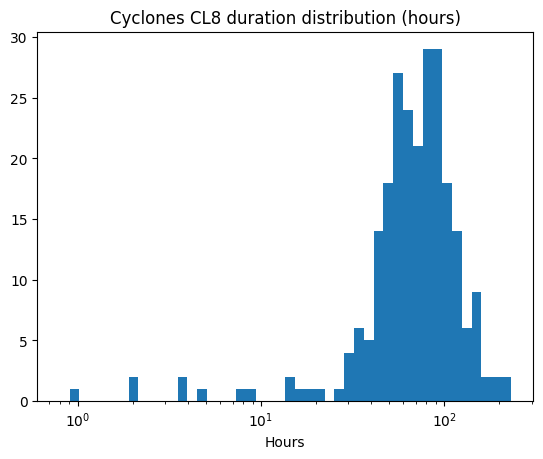

In [ ]:
df_bounds8 = cyclones_time_bounds(tracks_df_coord_MED_CL8)
histogram_cyclones_duration(df_bounds8, 8)

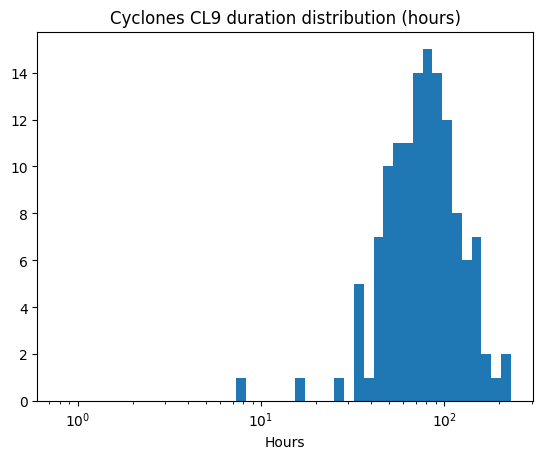

In [ ]:
df_bounds9 = cyclones_time_bounds(tracks_df_coord_MED_CL9)
histogram_cyclones_duration(df_bounds9, 9)

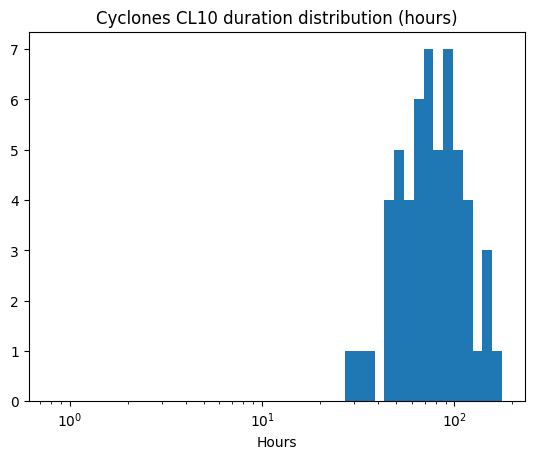

In [ ]:
df_bounds10 = cyclones_time_bounds(tracks_df_MED_CL10)
histogram_cyclones_duration(df_bounds10, 10)

In [61]:
tracks_df_MED_CL10.id_cyc_unico.nunique()

55

# Plot pressioni cicloni

/tmp/ipykernel_2741718/1098629537.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(len(ids), 1))


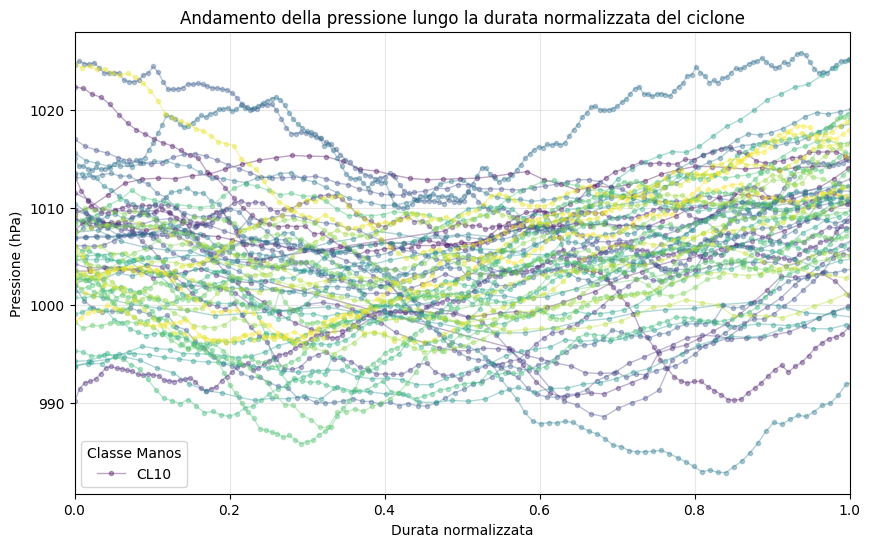

In [59]:
import numpy as np

def plot_pressure_vs_duration(df_tracks, manos_class, ax=None):
    if 'pressure' not in df_tracks.columns:
        raise ValueError("Il dataframe non contiene la colonna 'pressure'.")

    df_clean = df_tracks.dropna(subset=['pressure']).copy()
    if df_clean.empty:
        print(f"Nessun dato di pressione disponibile per CL{manos_class}.")
        return ax

    bounds = cyclones_time_bounds(df_clean)
    bounds = bounds[bounds['durata_hours'] > 0].copy()
    if bounds.empty:
        print(f"Durate non positive per CL{manos_class}.")
        return ax

    bounds = bounds.set_index('id_cyc_unico')
    start_map = bounds['start_time']
    duration_map = bounds['durata_hours']

    df_use = df_clean[df_clean['id_cyc_unico'].isin(bounds.index)].copy()
    if df_use.empty:
        print(f"Nessun ciclone valido per CL{manos_class}.")
        return ax

    df_use['elapsed_hours'] = (df_use['time'] - df_use['id_cyc_unico'].map(start_map)).dt.total_seconds() / 3600.0
    df_use['norm_duration'] = df_use['elapsed_hours'] / df_use['id_cyc_unico'].map(duration_map)
    df_use = df_use[np.isfinite(df_use['norm_duration']) & (df_use['norm_duration'] >= 0)]

    if df_use.empty:
        print(f"Nessun dato di pressione aggregato per CL{manos_class}.")
        return ax

    if ax is None:
        ax = plt.gca()

    ids = sorted(df_use['id_cyc_unico'].unique())
    cmap = plt.cm.get_cmap('viridis', max(len(ids), 1))
    class_label_added = False

    for idx, cyc_id in enumerate(ids):
        cyc_data = df_use[df_use['id_cyc_unico'] == cyc_id].sort_values('time')
        if cyc_data.empty:
            continue
        label = f"CL{manos_class}" if not class_label_added else None
        class_label_added = True
        ax.plot(
            cyc_data['norm_duration'],
            cyc_data['pressure'],
            marker='o',
            markersize=3,
            linewidth=1.0,
            alpha=0.35,
            color=cmap(idx % cmap.N),
            label=label
        )

    return ax

datasets_pressure = [
    (tracks_df_MED_CL10, 10),
]

fig, ax = plt.subplots(figsize=(10, 6))
for df_tracks, manos_class in datasets_pressure:
    plot_pressure_vs_duration(df_tracks, manos_class, ax=ax)

ax.set_xlabel('Durata normalizzata')
ax.set_ylabel('Pressione (hPa)')
ax.set_title('Andamento della pressione lungo la durata normalizzata del ciclone')
ax.set_xlim(0, 1.0)
ax.legend(title='Classe Manos')
ax.grid(True, alpha=0.3)
plt.show()


# Medicanes

In [2]:
from medicane_utils.load_files import decodifica_id_intero


In [ ]:
tracks_df_MED_CL7 = pd.read_csv("manos_CL7_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])

### aggiungo quelli da ERA5

In [23]:
df_era5 = pd.read_csv('medicane_data_input/era5_medicanes.csv', parse_dates=['time', 'start_time', 'end_time'])

# calcolo le coordinate in pixel
x_pix, y_pix = get_cyclone_center_pixel_vector(df_era5['lat'].values, df_era5['lon'].values)
df_era5['x_pix'] = x_pix
df_era5['y_pix'] = y_pix

# tolgo ianos che è l'unico già presente in tracks_df_MED_CL7
df_nuovi = df_era5[df_era5.name!='Ianos']
#overlap = tracks_df_MED_CL7.merge(df_nuovi['time'], on=['time'], how='inner')
#print(f"Trovate {len(overlap)} righe sovrapposte.")

# ── Risolvo i tipi NAN dovuti alle colonne mancanti ───────────────
#cols1 = set(tracks_df_MED_CL7.columns)
#cols2 = set(df_nuovi.columns)
#all_cols = cols1.union(cols2)

# ── 2. Per ogni colonna che manca, aggiungila con il tipo giusto ──
for c in ['id_cyc_unico', 'idorig']:
    if c not in df_nuovi:
        # esempio: se 'id' è intero, creiamo una serie di NA di tipo nullable Int64
        df_nuovi[c] = pd.Series([pd.NA] * len(df_nuovi), dtype='Int64')

/tmp/ipykernel_440356/3775172732.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuovi[c] = pd.Series([pd.NA] * len(df_nuovi), dtype='Int64')
/tmp/ipykernel_440356/3775172732.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuovi[c] = pd.Series([pd.NA] * len(df_nuovi), dtype='Int64')


In [24]:
tracks_df_MED_CL7['idorig'] = tracks_df_MED_CL7['id_cyc_unico'].apply(lambda x: decodifica_id_intero(x)[1])

/tmp/ipykernel_440356/1327363685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df_MED_CL7['idorig'] = tracks_df_MED_CL7['id_cyc_unico'].apply(lambda x: decodifica_id_intero(x)[1])


In [14]:
cc = [1328,1430,1461,1542,1575,1622,1702]
#[7 * 1_000_000 + c for c in cc]
tracks_df_medicanes = tracks_df_MED_CL7[tracks_df_MED_CL7['idorig'].isin(cc)]
tracks_df_medicanes.shape

(878, 10)

In [ ]:
tracks_df_medicanes.to_csv("medicane_data_input/manos_medicanes_only.csv", index=False)

In [61]:
#pd.set_option('display.max_rows', 500)
#df_nuovi.head(500)

In [51]:
df_all = pd.concat([tracks_df_MED_CL7, df_nuovi], ignore_index=True)

In [52]:
df_all.name.unique()

array([nan, 'Apollo', 'Blas', 'Daniel', 'Helios', 'Juliette'],
      dtype=object)

### Seleziono più medicanes

In [53]:
cc = [1328,1461,1542,1575,1702, 1716, 1674, 1715, 1521, 1283, 1466, 1500, 1421, 1358]
# relativi all'anno 2018 e quindi da escludere (immagini nere): 1430, 1622
print(sorted(cc), len(cc))
#[7 * 1_000_000 + c for c in cc]
known_medicanes = df_all.name.notna()
tracks_df_medicanes = df_all[(df_all['idorig'].isin(cc)) | known_medicanes]
tracks_df_medicanes.shape

[1283, 1328, 1358, 1421, 1461, 1466, 1500, 1521, 1542, 1575, 1674, 1702, 1715, 1716] 14


(2103, 11)

In [ ]:
tracks_df_medicanes.to_csv("medicane_data_input/more_medicanes.csv", index=False)

In [7]:
tracks_df_medicanes = pd.read_csv("medicane_data_input/more_medicanes.csv", parse_dates=['time', 'start_time', 'end_time'])

In [8]:
tracks_df_medicanes

,id_cyc_unico,start_time,end_time,lat,lon,time,source,x_pix,y_pix,idorig,name
0,7001283.0,2010-10-11 17:00:00,2010-10-13 20:00:00,36.300,7.220,2010-10-11 17:00:00,CL7,441,237,1283.0,NaN
1,7001283.0,2010-10-11 17:00:00,2010-10-13 20:00:00,36.479,6.902,2010-10-11 18:00:00,CL7,432,233,1283.0,NaN
2,7001283.0,2010-10-11 17:00:00,2010-10-13 20:00:00,36.655,6.649,2010-10-11 19:00:00,CL7,425,228,1283.0,NaN
3,7001283.0,2010-10-11 17:00:00,2010-10-13 20:00:00,36.844,6.496,2010-10-11 20:00:00,CL7,421,223,1283.0,NaN
4,7001283.0,2010-10-11 17:00:00,2010-10-13 20:00:00,37.040,6.375,2010-10-11 21:00:00,CL7,418,218,1283.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2098,NaN,2023-02-26 19:00:00,2023-03-03 08:00:00,41.000,7.750,2023-03-03 04:00:00,ERA5,460,119,NaN,Juliette
2099,NaN,2023-02-26 19:00:00,2023-03-03 08:00:00,41.000,7.750,2023-03-03 05:00:00,ERA5,460,119,NaN,Juliette
2100,NaN,2023-02-26 19:00:00,2023-03-03 08:00:00,40.750,7.500,2023-03-03 06:00:00,ERA5,453,125,NaN,Juliette
2101,NaN,2023-02-26 19:00:00,2023-03-03 08:00:00,40.500,7.500,2023-03-03 07:00:00,ERA5,453,131,NaN,Juliette


In [75]:
tracks_df_medicanes#.source.fillna('ERA5', inplace=True)

,id_cyc_unico,start_time,end_time,lat,lon,time,source,x_pix,y_pix,idorig,name
2263,7001283,2010-10-11 17:00:00,2010-10-13 20:00:00,36.300,7.220,2010-10-11 17:00:00,CL7,441,237,1283,NaN
2264,7001283,2010-10-11 17:00:00,2010-10-13 20:00:00,36.479,6.902,2010-10-11 18:00:00,CL7,432,233,1283,NaN
2265,7001283,2010-10-11 17:00:00,2010-10-13 20:00:00,36.655,6.649,2010-10-11 19:00:00,CL7,425,228,1283,NaN
2266,7001283,2010-10-11 17:00:00,2010-10-13 20:00:00,36.844,6.496,2010-10-11 20:00:00,CL7,421,223,1283,NaN
2267,7001283,2010-10-11 17:00:00,2010-10-13 20:00:00,37.040,6.375,2010-10-11 21:00:00,CL7,418,218,1283,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30923,<NA>,2023-02-26 19:00:00,2023-03-03 08:00:00,41.000,7.750,2023-03-03 04:00:00,ERA5,460,119,<NA>,Juliette
30924,<NA>,2023-02-26 19:00:00,2023-03-03 08:00:00,41.000,7.750,2023-03-03 05:00:00,ERA5,460,119,<NA>,Juliette
30925,<NA>,2023-02-26 19:00:00,2023-03-03 08:00:00,40.750,7.500,2023-03-03 06:00:00,ERA5,453,125,<NA>,Juliette
30926,<NA>,2023-02-26 19:00:00,2023-03-03 08:00:00,40.500,7.500,2023-03-03 07:00:00,ERA5,453,131,<NA>,Juliette


### Cambio le start_time e end_time secondo le nuove date da new_cyc_limits.csv

In [3]:
df_new_limits = pd.read_csv('medicane_data_input/new_cyc_limits.csv', parse_dates=['new_start', 'new_end'])
df_new_limits.id = df_new_limits.id.astype('Int32')
df_new_limits

,id,new_start,new_end,name
0,7001358,2012-04-13 04:15:00,2012-04-14 21:00:00,NaN
1,7001421,2013-11-18 22:00:00,2013-11-20 09:00:00,NaN
2,7001500,2015-09-30 21:25:00,2015-10-01 21:00:00,NaN
3,7001466,2014-11-30 06:25:00,2014-12-03 06:30:00,NaN
4,7001521,2016-02-28 23:20:00,2016-03-01 08:05:00,NaN
5,7001715,2020-12-13 08:20:00,2020-12-16 13:45:00,NaN
6,7001674,2019-11-10 09:30:00,2019-11-11 17:30:00,NaN
7,7001716,2020-12-25 10:35:00,2020-12-27 10:50:00,NaN
8,7001702,2020-09-14 23:50:00,2020-09-18 19:40:00,NaN
9,7001575,2017-11-16 14:45:00,2017-11-18 12:40:00,NaN


##### Optional: corrispondenza tra nome e id

In [4]:
df_id_name = pd.read_csv('medicane_data_input/IDcyclones_TRACKS_CL7_Flaounas.txt', sep='\s+', names=['name','year','id'])
df_id_name.id = df_id_name.id.astype('Int32')
df_id_name['id_cyc_unico'] = 7_000_000 + df_id_name.id
df_id_name = df_id_name.drop(columns=['id','year']).rename(columns={'id_cyc_unico':'id'})

In [5]:
df_id_name

,name,id
0,Unnamed,7000870
1,Unnamed,<NA>
2,Fernando,7000987
3,Adelina,7000995
4,Unnamed,7001042
5,Unnamed,7001046
6,Zeo,7001084
7,Maria,7001113
8,Antinoo,7001136
9,Ortensiano,7001152


In [6]:
df_new_limits.merge(df_id_name, on='id', how='left')

,id,new_start,new_end,name_x,name_y
0,7001358,2012-04-13 04:15:00,2012-04-14 21:00:00,NaN,Unnamed
1,7001421,2013-11-18 22:00:00,2013-11-20 09:00:00,NaN,NaN
2,7001500,2015-09-30 21:25:00,2015-10-01 21:00:00,NaN,NaN
3,7001466,2014-11-30 06:25:00,2014-12-03 06:30:00,NaN,NaN
4,7001521,2016-02-28 23:20:00,2016-03-01 08:05:00,NaN,NaN
5,7001715,2020-12-13 08:20:00,2020-12-16 13:45:00,NaN,Unnamed
6,7001674,2019-11-10 09:30:00,2019-11-11 17:30:00,NaN,NaN
7,7001716,2020-12-25 10:35:00,2020-12-27 10:50:00,NaN,NaN
8,7001702,2020-09-14 23:50:00,2020-09-18 19:40:00,NaN,Ianos
9,7001575,2017-11-16 14:45:00,2017-11-18 12:40:00,NaN,Numa


##### Final df_tracks with updated time windows

In [9]:
# --- nomi reali delle colonne (modifica a piacere)
id_num1, id_str1 = 'id_cyc_unico',  'name'   # df1
id_num2, id_str2 = 'id', 'name'  # df2

# --- helper per creare la chiave
def build_id_key(df, col_num, col_str):
    """
    Restituisce una Series con priorità al numerico
    e converte tutto in string per uniformità.
    """
    # Int64 conserva i NA “veri” senza convertirli in float
    num = df[col_num].astype('Int64').astype('string')
    string = df[col_str].astype('string')

    return num.fillna(string)             # preferenza al numerico

# aggiungiamo la colonna chiave ai due DataFrame
df1 = tracks_df_medicanes.assign(id_key = build_id_key(tracks_df_medicanes, id_num1, id_str1))
df2 = df_new_limits.assign(id_key = build_id_key(df_new_limits, id_num2, id_str2))


In [11]:
df2

,id,new_start,new_end,name,id_key
0,7001358,2012-04-13 04:15:00,2012-04-14 21:00:00,NaN,7001358
1,7001421,2013-11-18 22:00:00,2013-11-20 09:00:00,NaN,7001421
2,7001500,2015-09-30 21:25:00,2015-10-01 21:00:00,NaN,7001500
3,7001466,2014-11-30 06:25:00,2014-12-03 06:30:00,NaN,7001466
4,7001521,2016-02-28 23:20:00,2016-03-01 08:05:00,NaN,7001521
5,7001715,2020-12-13 08:20:00,2020-12-16 13:45:00,NaN,7001715
6,7001674,2019-11-10 09:30:00,2019-11-11 17:30:00,NaN,7001674
7,7001716,2020-12-25 10:35:00,2020-12-27 10:50:00,NaN,7001716
8,7001702,2020-09-14 23:50:00,2020-09-18 19:40:00,NaN,7001702
9,7001575,2017-11-16 14:45:00,2017-11-18 12:40:00,NaN,7001575


In [77]:
cols_rename = {'new_start': 'start_time',
               'new_end'  : 'end_time'}

df2_reduced = df2.rename(columns=cols_rename)[['id_key', 'start_time', 'end_time']]

In [78]:
df_updated = (df1
      .drop(columns=['start_time', 'end_time'])   # scartiamo i vecchi valori
      .merge(df2_reduced, on='id_key', how='left', validate='m:1')
      .drop(columns='id_key')                     # opzionale: togliamo la chiave tecnica
)

In [79]:
df_updated

,id_cyc_unico,lat,lon,time,source,x_pix,y_pix,idorig,name,start_time,end_time
0,7001283,36.300,7.220,2010-10-11 17:00:00,CL7,441,237,1283,NaN,2010-10-12 12:55:00,2010-10-13 13:25:00
1,7001283,36.479,6.902,2010-10-11 18:00:00,CL7,432,233,1283,NaN,2010-10-12 12:55:00,2010-10-13 13:25:00
2,7001283,36.655,6.649,2010-10-11 19:00:00,CL7,425,228,1283,NaN,2010-10-12 12:55:00,2010-10-13 13:25:00
3,7001283,36.844,6.496,2010-10-11 20:00:00,CL7,421,223,1283,NaN,2010-10-12 12:55:00,2010-10-13 13:25:00
4,7001283,37.040,6.375,2010-10-11 21:00:00,CL7,418,218,1283,NaN,2010-10-12 12:55:00,2010-10-13 13:25:00
...,...,...,...,...,...,...,...,...,...,...,...
2098,<NA>,41.000,7.750,2023-03-03 04:00:00,ERA5,460,119,<NA>,Juliette,2023-02-27 19:00:00,2023-03-02 13:30:00
2099,<NA>,41.000,7.750,2023-03-03 05:00:00,ERA5,460,119,<NA>,Juliette,2023-02-27 19:00:00,2023-03-02 13:30:00
2100,<NA>,40.750,7.500,2023-03-03 06:00:00,ERA5,453,125,<NA>,Juliette,2023-02-27 19:00:00,2023-03-02 13:30:00
2101,<NA>,40.500,7.500,2023-03-03 07:00:00,ERA5,453,131,<NA>,Juliette,2023-02-27 19:00:00,2023-03-02 13:30:00


In [ ]:
# more_medicanes_time_updated è il file finale con i nuovi limiti temporali 

In [ ]:
df_updated.to_csv("medicane_data_input/more_medicanes_time_updated.csv", index=False)

In [14]:
df_updated = pd.read_csv("medicane_data_input/more_medicanes_time_updated.csv", parse_dates=['time', 'start_time', 'end_time'])
df_updated[df_updated.id_cyc_unico == 7001358]

,id_cyc_unico,lat,lon,time,source,x_pix,y_pix,idorig,name,start_time,end_time,id_final
158,7001358.0,31.000,-4.630,2012-04-10 19:00:00,CL7,76,389,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
159,7001358.0,31.000,-4.651,2012-04-10 20:00:00,CL7,75,389,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
160,7001358.0,31.000,-4.644,2012-04-10 21:00:00,CL7,75,389,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
161,7001358.0,31.000,-4.608,2012-04-10 22:00:00,CL7,76,389,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
162,7001358.0,30.996,-4.570,2012-04-10 23:00:00,CL7,77,389,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
...,...,...,...,...,...,...,...,...,...,...,...,...
252,7001358.0,41.426,18.291,2012-04-14 17:00:00,CL7,740,111,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
253,7001358.0,41.556,18.416,2012-04-14 18:00:00,CL7,743,108,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
254,7001358.0,41.704,18.368,2012-04-14 19:00:00,CL7,741,105,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
255,7001358.0,41.880,18.172,2012-04-14 20:00:00,CL7,736,101,1358.0,NaN,2012-04-13 04:15:00,2012-04-14 21:00:00,7001358
